<h1 align="center"> Filoger Summer School 2022<h1>
<h1 align="center"> Data Science & Machine Learning (Dr.Zabihin) <h1>

# Polynomial Regression

### Step1: Import all necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Step2: Import the Dataset

In [2]:
df= pd.read_csv('Advertising.csv')

### Step3: Data Overview

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


**Note: You can do more overview by yourself**

### Step4: EDA

**Note: Do it by yourself**

### Step5: Determine the Features & Target Variable

In [3]:
X=df.drop('sales', axis=1)
y=df['sales']

### Step6: Preprocessing

In [4]:
from sklearn.preprocessing import PolynomialFeatures

In [6]:
polynomial_converter=PolynomialFeatures(degree=2, include_bias=False)

In [7]:
poly_features=polynomial_converter.fit_transform(X)

In [17]:
#poly_features=polynomial_converter.transform(X)

In [18]:
poly_features.shape
#Poly_Features: X1, X2, X3, X1^2, X2^2, X3^2, X1X2, X1X3, X2X3

(200, 9)

In [19]:
X.shape

(200, 3)

### Step7: Split the Data to Train & Test

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

### Step8: Train the Model

In [11]:
from sklearn.linear_model import LinearRegression

In [23]:
polymodel=LinearRegression()

In [24]:
polymodel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Step9: Predicting Test Data

In [25]:
y_pred=polymodel.predict(X_test)

In [26]:
pd.DataFrame({'Y_Test': y_test,'Y_Pred':y_pred, 'Residuals':(y_test-y_pred) }).head(5)

,Y_Test,Y_Pred,Residuals
37,14.7,13.948562,0.751438
109,19.8,19.334803,0.465197
31,11.9,12.319282,-0.419282
89,16.7,16.762863,-0.062863
66,9.5,7.902109,1.597891


### Step10: Evaluating the Model

In [27]:
from sklearn import metrics

In [28]:
MAE_Poly = metrics.mean_absolute_error(y_test,y_pred)
MSE_Poly = metrics.mean_squared_error(y_test,y_pred)
RMSE_Poly = np.sqrt(MSE_Poly)

pd.DataFrame([MAE_Poly, MSE_Poly, RMSE_Poly], index=['MAE', 'MSE', 'RMSE'], columns=['metrics'])

,metrics
MAE,0.489680
MSE,0.441751
RMSE,0.664643


**Compare to the simple linear regression:**

In [30]:
XS_train, XS_test, ys_train, ys_test = train_test_split(X, y, test_size=0.3, random_state=101)
simplemodel=LinearRegression()
simplemodel.fit(XS_train, ys_train)
ys_pred=simplemodel.predict(XS_test)

MAE_simple = metrics.mean_absolute_error(ys_test,ys_pred)
MSE_simple = metrics.mean_squared_error(ys_test,ys_pred)
RMSE_simple = np.sqrt(MSE_simple)

In [31]:
pd.DataFrame({'Poly Metrics': [MAE_Poly, MSE_Poly, RMSE_Poly], 'Simple Metrics':[MAE_simple, MSE_simple, RMSE_simple]}, index=['MAE', 'MSE', 'RMSE'])

,Poly Metrics,Simple Metrics
MAE,0.489680,1.213746
MSE,0.441751,2.298717
RMSE,0.664643,1.516152


### Step11: Adjusting Model Parameters

In [32]:
# Train List of RMSE per degree
train_RMSE_list=[]
#Test List of RMSE per degree
test_RMSE_list=[]

for d in range(1,10):
    
    #Preprocessing
    #create poly data set for degree (d)
    polynomial_converter= PolynomialFeatures(degree=d, include_bias=False)
    poly_features= polynomial_converter.fit(X)
    poly_features= polynomial_converter.transform(X)
    
    #Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    #Train the Model
    polymodel=LinearRegression()
    polymodel.fit(X_train, y_train)
    
    #Predicting on both Train & Test Data
    y_train_pred=polymodel.predict(X_train)
    y_test_pred=polymodel.predict(X_test)
    
    #Evaluating the Model
    
    #RMSE of Train set
    train_RMSE=np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    
    #RMSE of Test Set
    test_RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    
    #Append the RMSE to the Train and Test List
    
    train_RMSE_list.append(train_RMSE)
    test_RMSE_list.append(test_RMSE)

In [33]:
train_RMSE_list

[1.7345941243293763,
 0.5879574085292231,
 0.4339344356902066,
 0.3517083688399356,
 0.2509342978480938,
 0.19457999210390317,
 5.416814234426843,
 0.17079045411006724,
 0.17127902876510234]

In [37]:
test_RMSE_list

[1.5161519375993884,
 0.664643175726899,
 0.5803286825211679,
 0.5077742611973293,
 2.5758168655064653,
 4.255767916982672,
 1385.592709747881,
 3480.460443121411,
 94356.74501868308]

**Plot the Polynomial degree VS RMSE**

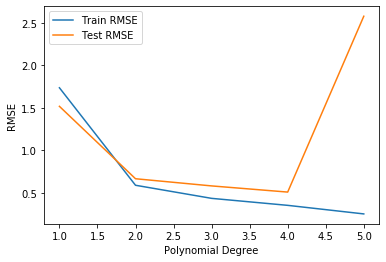

In [32]:

plt.plot(range(1,6), train_RMSE_list[:5], label='Train RMSE')
plt.plot(range(1,6), test_RMSE_list[:5], label='Test RMSE')

plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.legend()

### Step12: Finalizing Model Parameters:

In [38]:
#Create Polynomial Features
Final_polynomial_converter= PolynomialFeatures(degree=3, include_bias=False)

Final_poly_features= Final_polynomial_converter.fit(X)
Final_poly_features= Final_polynomial_converter.transform(X)

#Split the DataSet
X_train, X_test, y_train, y_test = train_test_split(Final_poly_features, y, test_size=0.3, random_state=101)

#Train the model
Final_PolyModel=LinearRegression()
Final_PolyModel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Step13: Saving the Model

In [39]:
from joblib import dump, load

In [40]:
dump(Final_PolyModel, 'Sales_PolyModel.joblib')

['Sales_PolyModel.joblib']

In [41]:
dump(Final_polynomial_converter, 'Poly_Converter.joblib')

['Poly_Converter.joblib']

### Deployment

In [42]:
Load_Converter=load('Poly_Converter.joblib')
Load_PolyModel=load('Sales_PolyModel.joblib')

In [43]:
#Predict the sale for a campaign with advertising in TV=150, radio=25, newspaper=10
campaign=[[149,22,12]]

In [44]:
campaign_poly=Load_Converter.transform(campaign)

In [45]:
Final_PolyModel.predict(campaign_poly)

array([14.62125519])